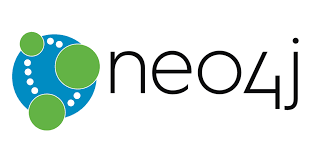

```{note} Objectifs

L'objectif de ce TP est de prendre en main l'environnement Neo4J et de réaliser des requêtes via le langage de requêtage natif Cypher.
Vous apprendrez à :
* utiliser l'interface graphique de Neo4J
* exploiter les propriétés des noeuds et relations
* exprimer des requêtes en lecture avec Cypher
```

## Prérequis

* Vérifier que Docker desktop est bien démarré
* Ouvrer un terminal ssh et positionnez vous dans le répertoire `$monrepertoire/docker`.
  

Vérifiez que votre container Neo4J est opérationnel :

## Connexion à Neo4J

Pour travailler avec Neo4j, nous utiliserons l'outil graphique embarqué avec Neo4J disponible à l'url :

http://127.0.0.1:7474

Lors de votre première connexion à l'interface Neo4j, on vous demandera de changer le mot de passe administrateur neo4j. 

user : neo4j</br>
password : neo4j</br>


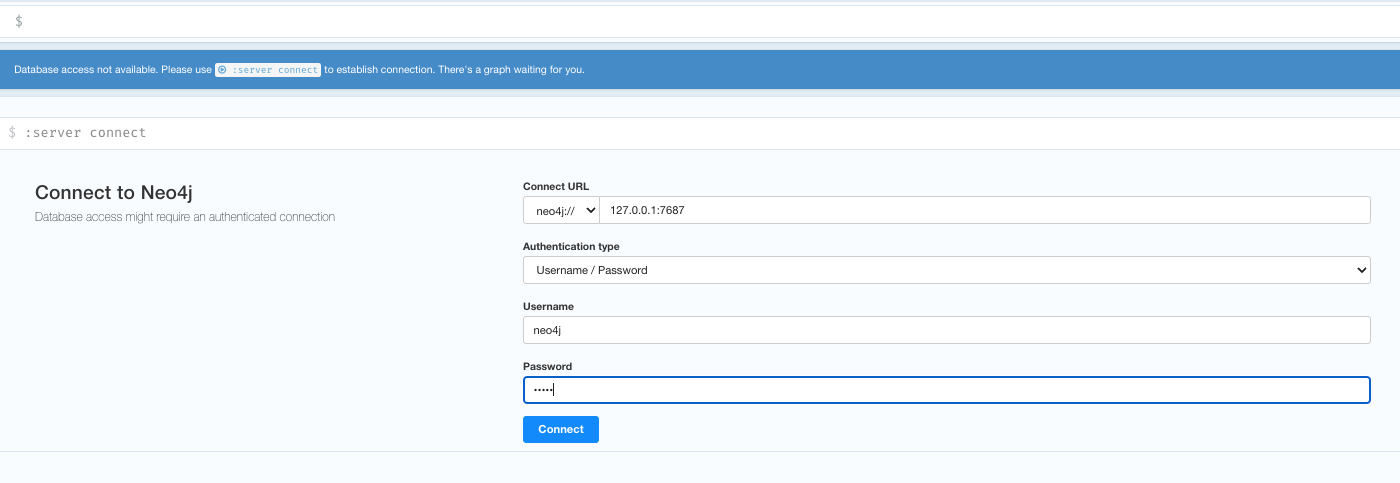

Changer le mot de passe avec la valeur `nosql2024`

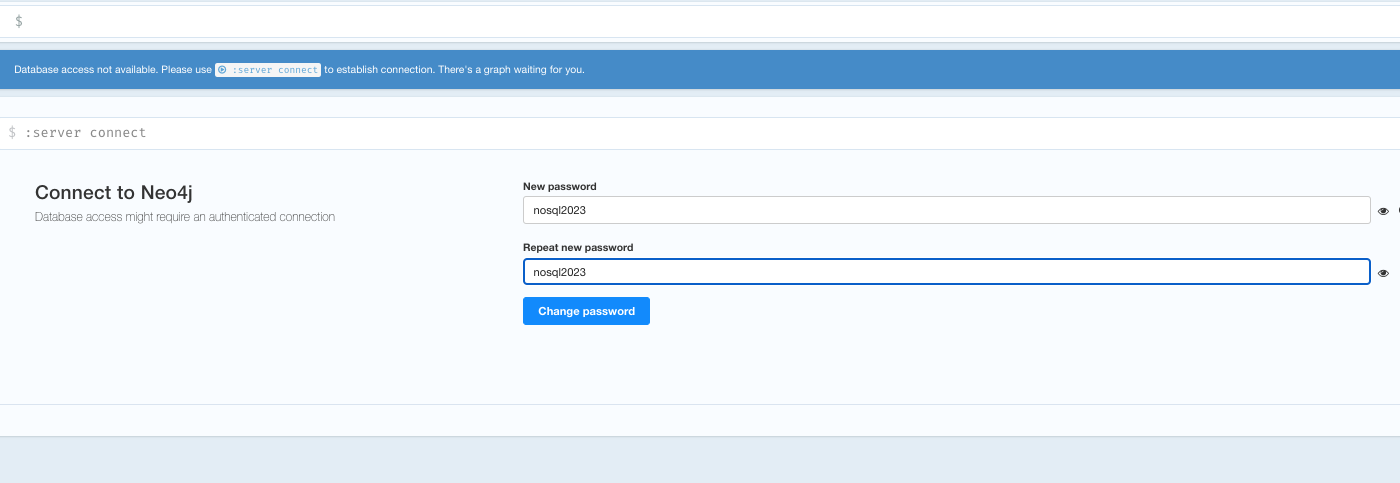

La page suivante apparait.



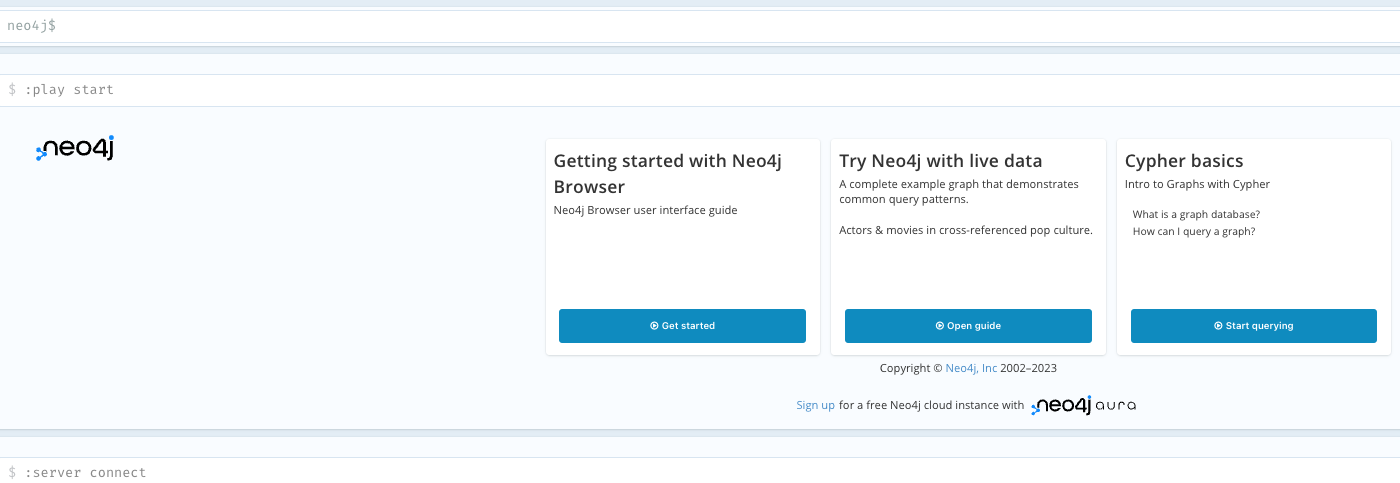

En haut de la page vous bénéficiez d'un prompt pour entrer les requêtes cypher.

Initialisez le jeux de données movies avec la commande `:play movies`

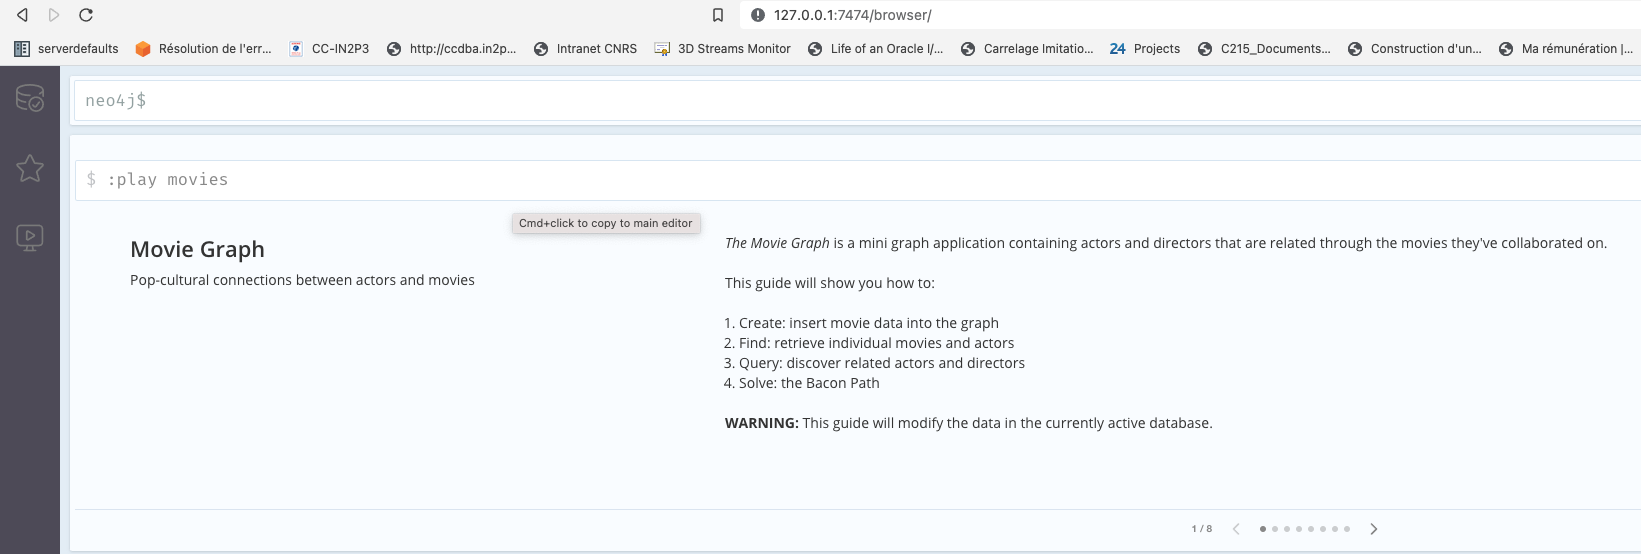

Un guide s'affiche avec les instructions pour créer le graphe movies :

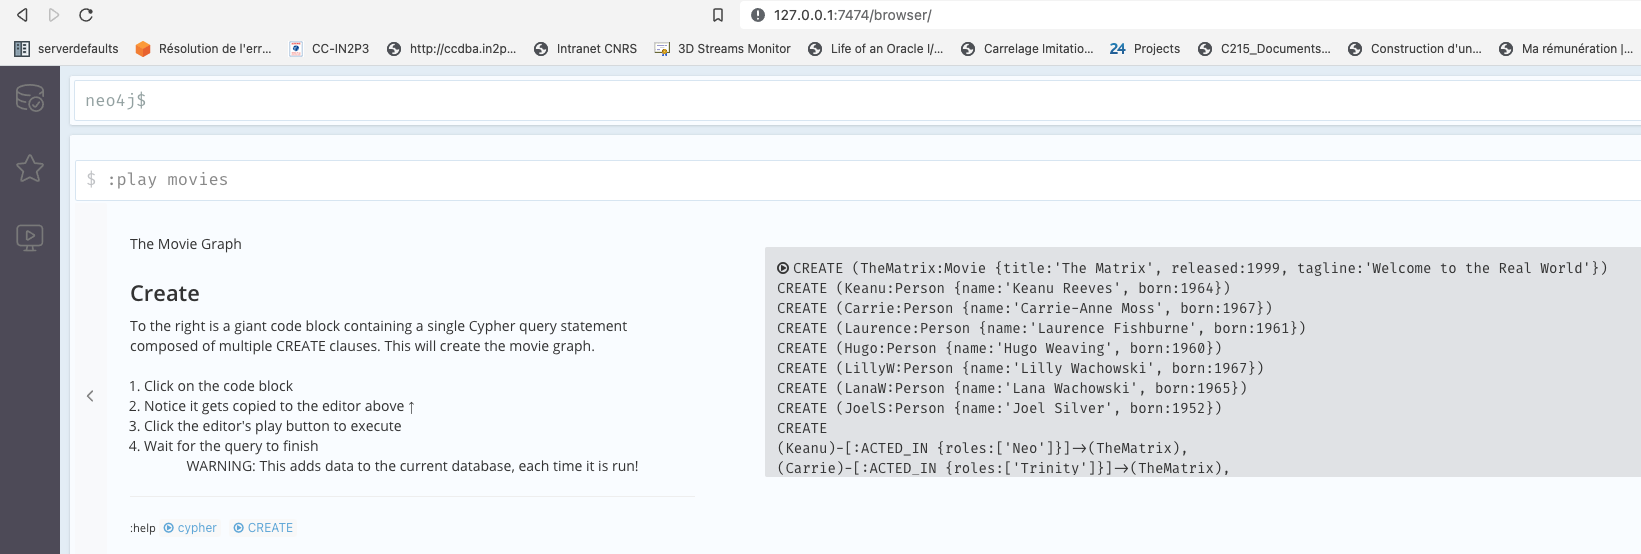

Cliquez sur le panneau de droite CREATE, celle-ci créera automatiquement le graphe :

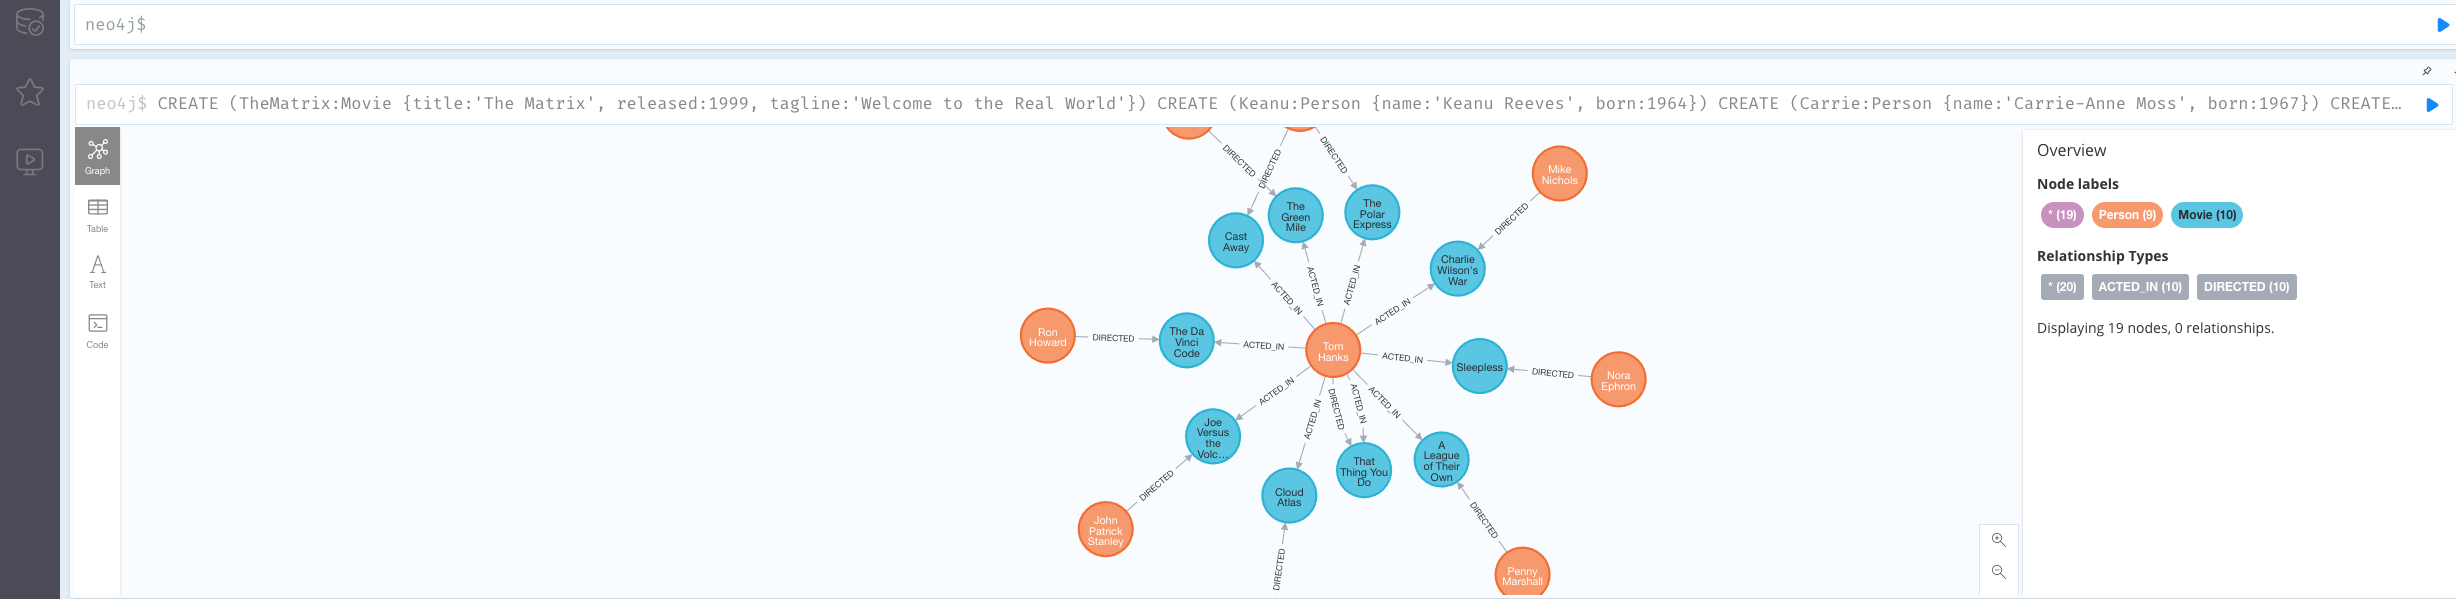

Vous êtes à présent prêt pour pratiquer le cypher.

Dans ce TP, vous apprendrez à intérroger les propriétés des noeuds et des relations.

Pour plus d'information sur la syntaxe du langage suivez le lien ci-dessous :

https://neo4j.com/docs/cypher-manual/3.5/





# 1 - Interroger une base graphe

A partir de la console web de Neo4j, vous pouvez intérroger la base Neo4J avec la commande MATCH :

Notez que la commande MATCH est le SELECT d'un SGBDR.

Vous pouvez consulter l'ensemble des noeuds existants avec la commande MATCH :



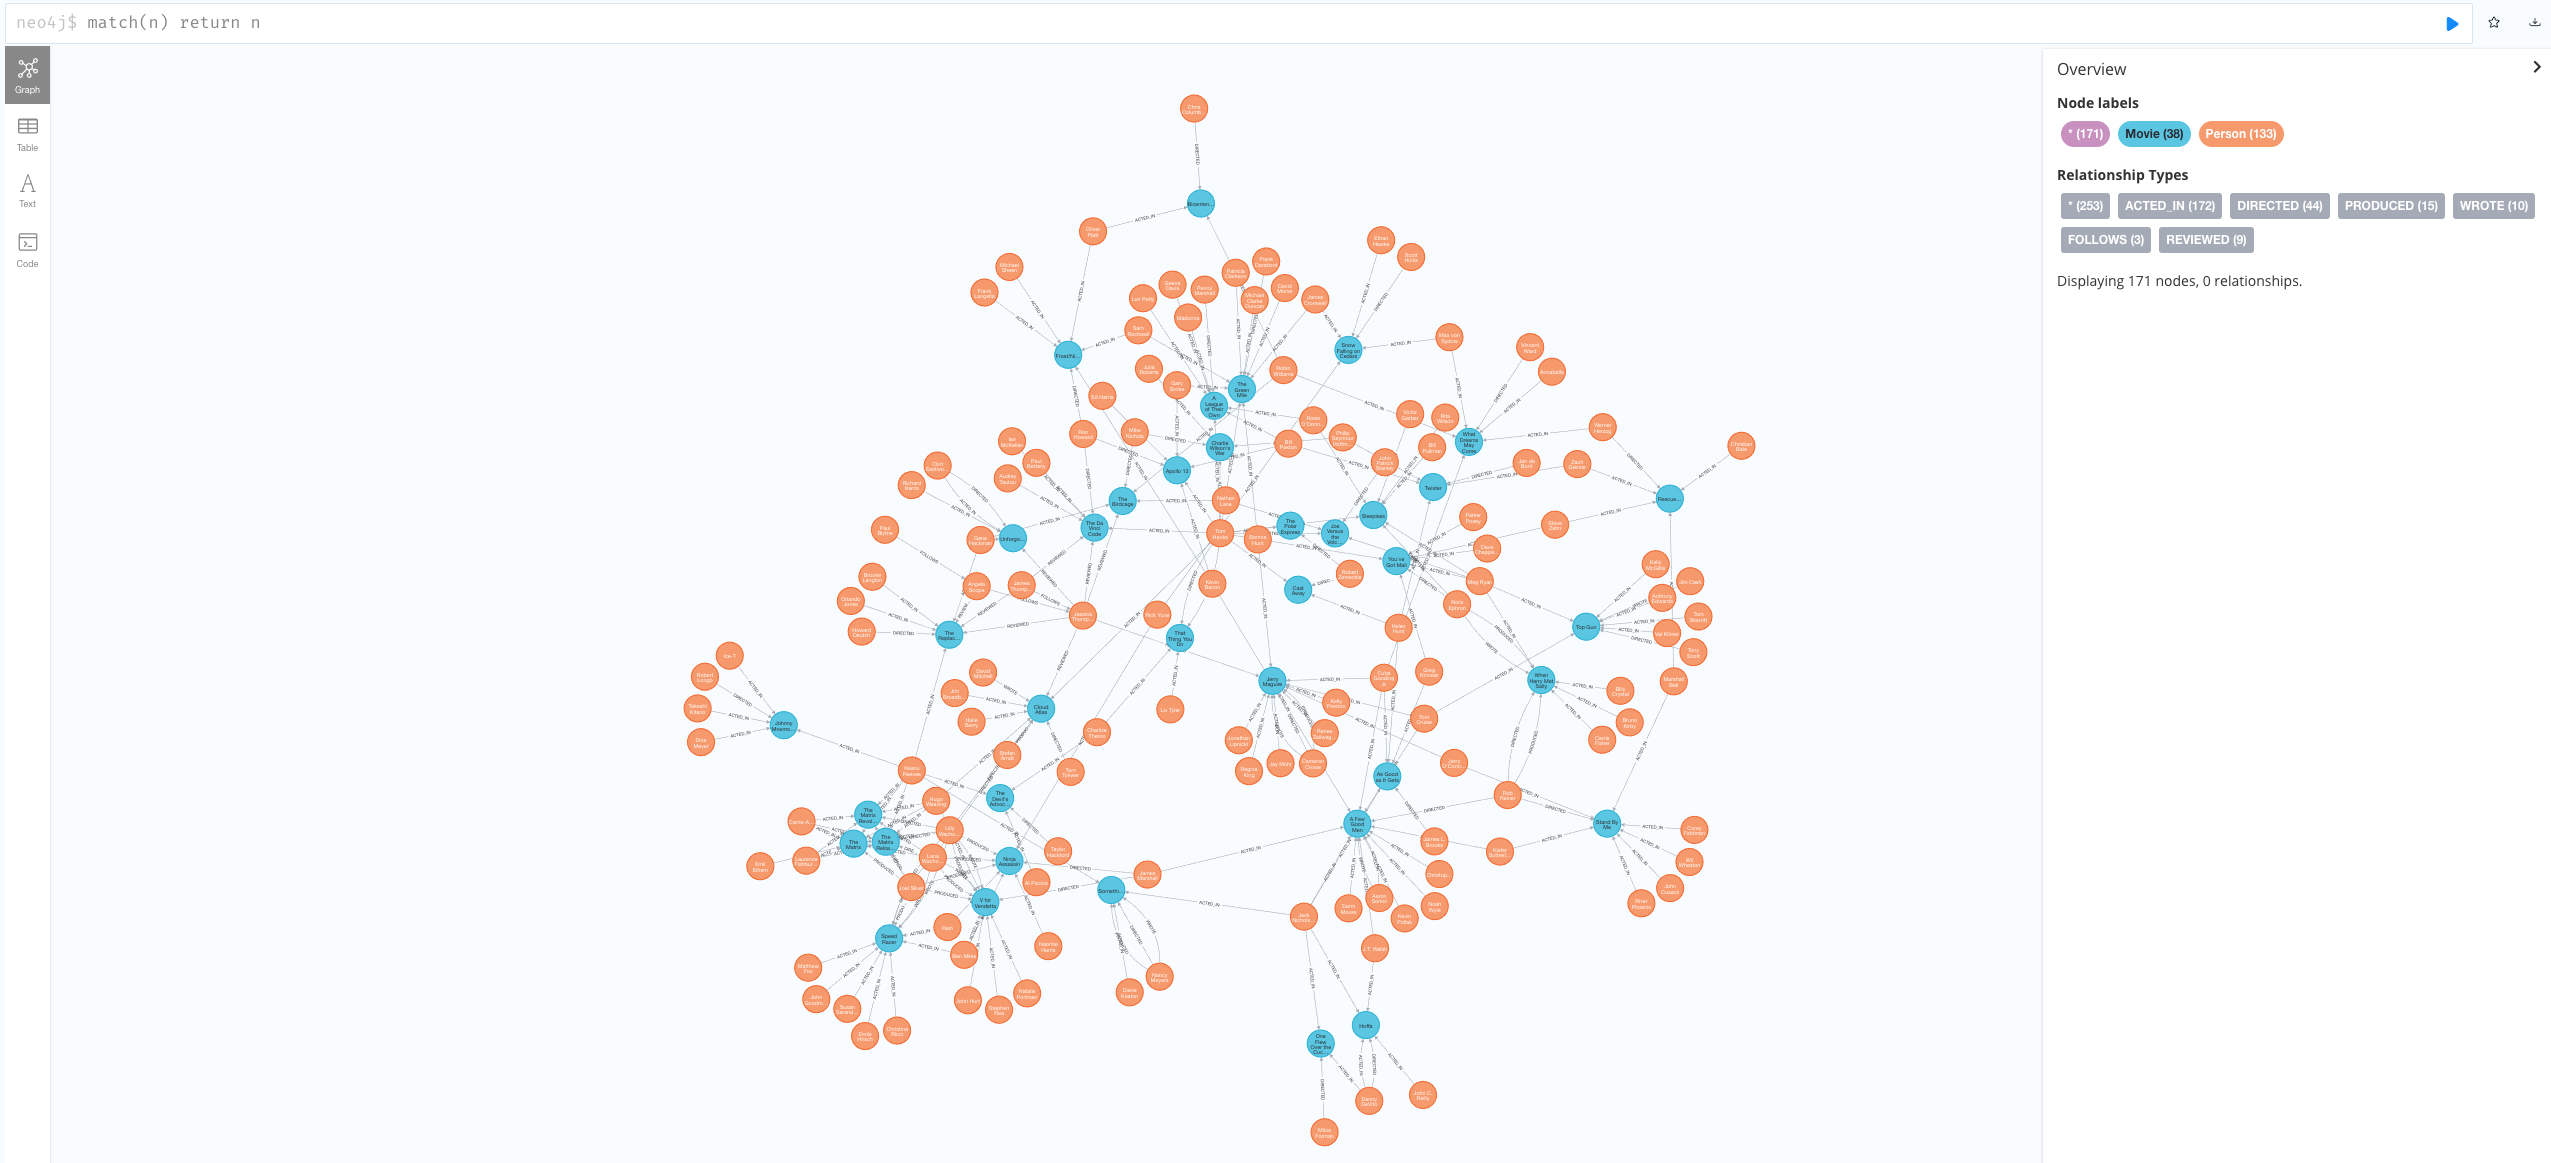

## 1-1 Proriété des noeuds

Un noeud dispose de propriétés si vous souhaitez filtrer les noeuds sur une des proriétes il vous suffit de compléter la clause WHERE de la command MATCH :

Match(n) WHERE n.title='Apollo 13' return n;



Comme vous l'aurez compris le n de la commande MATCH spécifie l'ensemble des noeuds qui satisfont la condition.

Vous remarquerez aussi que le noeud est colorié en bleu pour faire référence au label qui lui a été attaché(i.e. Movie).


Par défaut, la commande MATCH vous retournera le noeud avec toutes ses propriétés.

Si vous voulez uniquement récupérer le titre du film, vous pouvez le faire de la manière suivante :

Match(n) WHERE n.title='Apollo 13' return n.title,n.released,labels(n);


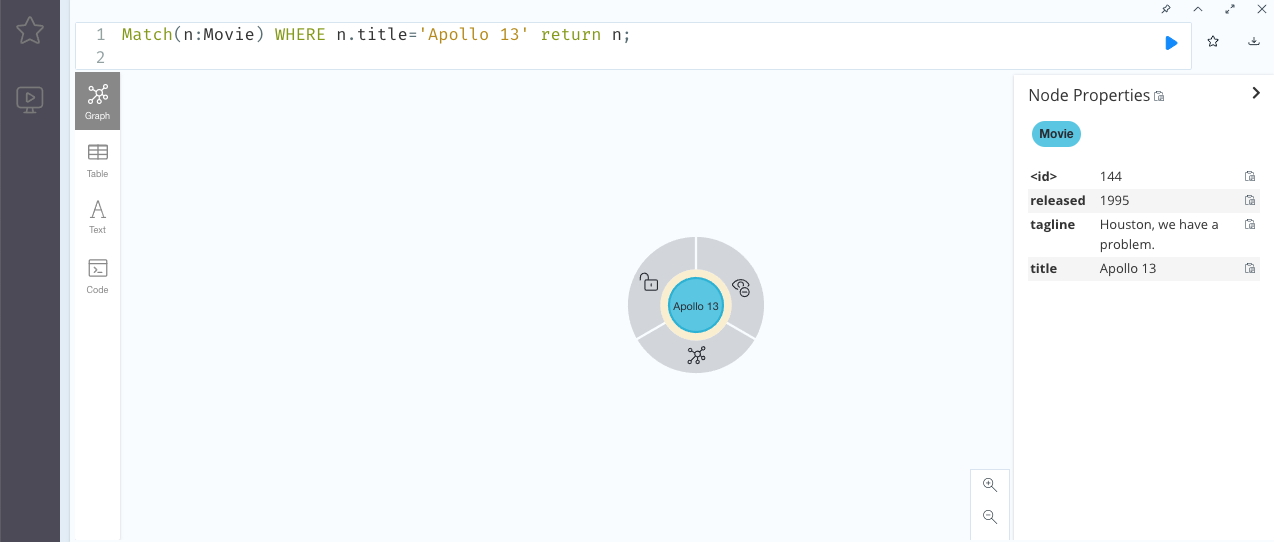

Un noeud dispose d'un où plusieurs Labels qui sont généralement utilisés pour identifier le où les types d'entité que le noeud représente.
Dans la requête précédente n peut être de n'importe quelle type d'entité pour s'assurer du type d'entité on peut inclure dans la commande MATCH le nom du label attendu: 

Match(n:Movie) WHERE n.title='Apollo 13' return n;

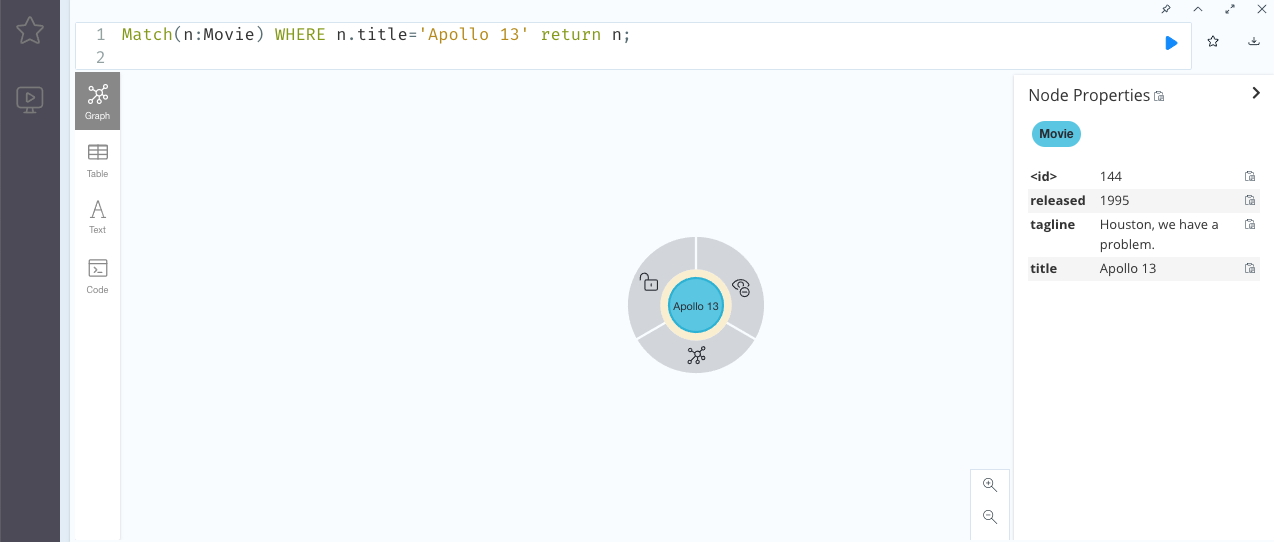

## 1.2  Les relations

Les noeuds sont reliées entre eux par des relations.

On peut identifier l'ensemble des relations existantes de la manière suivante :

Match(n)-[r]-(p) return n,r,p;


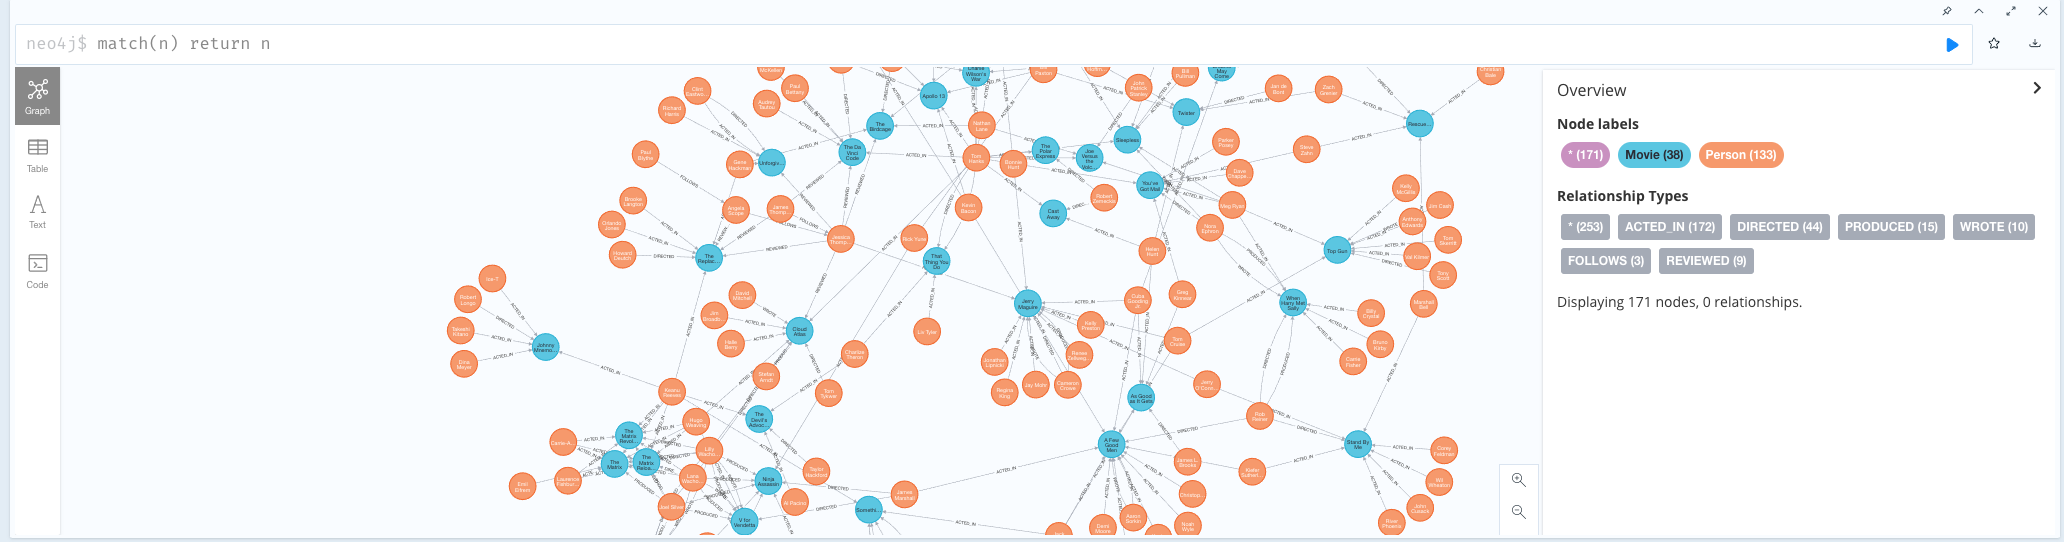


On voit que notre base de données dispose de 2 entités/labels (133 Persons et 38 Movies).

Il existe plusieurs relations qui lient les personnes et les films :

* ACTED_IN
* WROTE
* DIRECTED
* PRODUCED

Chaque type de relation est définie avec un Label.

Pour établir une recherche avec une relation spécifique voici la syntaxe :

match (n)-[r:WROTE|ACTED_IN]-(p) return n,r,p

Nous recherchons tous les noeuds (n) qui ont une relation [r] 'WROTE' où 'ACTED_IN'  avec d'autres noeuds (p) et nous retournons les noeuds n et p ainsi que les relations r.

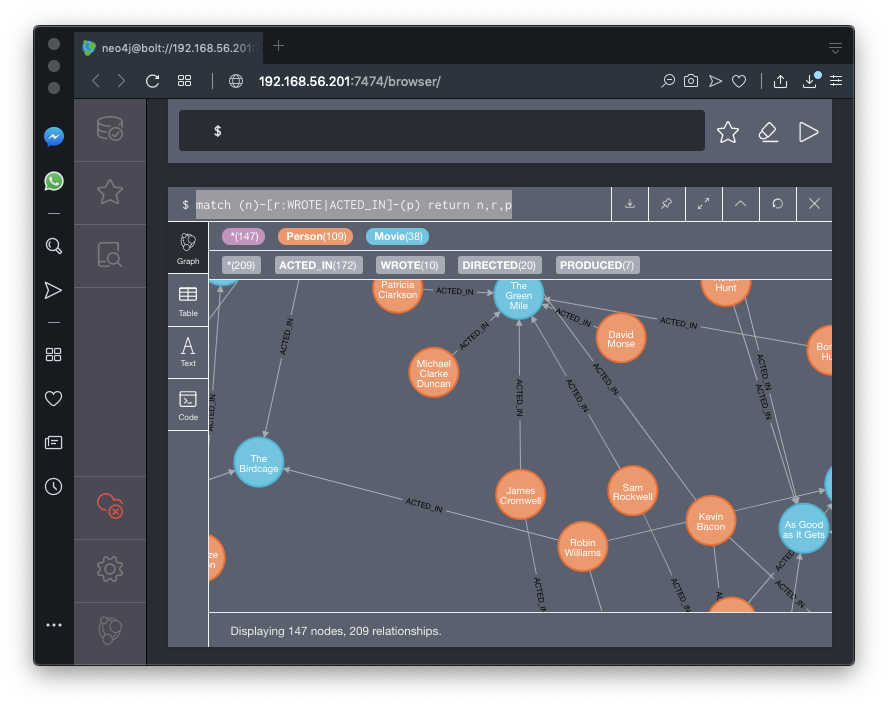


Bien entendu, une relation peut avoir des propriétés et au même titre que les noeuds il est possible de les exploiter :

match (n)-[r:WROTE|ACTED_IN]-(p) return  r.roles,type(r),n.name,p.name

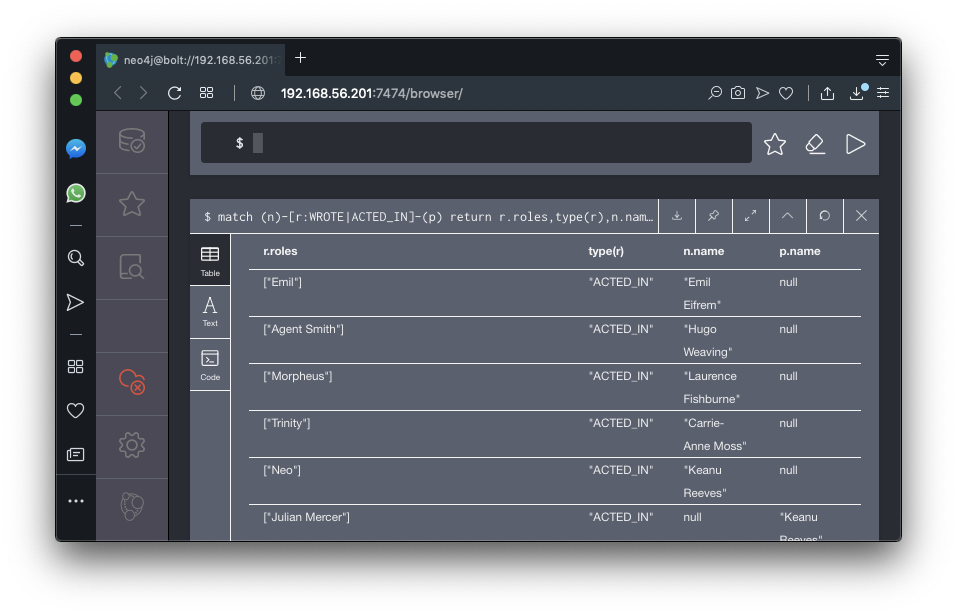


Si vous vous souvenez du cours, le graphe est orienté ce qui veut dire que nous avons des arcs orientés comme relation. 

Dans la section précédente ne nous sommes pas soucié dans quel sens la relation devait être définie.

Pour définir le sens d'une relation il suffit de dessiner une fléche -> .

match(p:Person)-[r:ACTED_IN]->(mv:Movie) where mv.title=~'Cloud Atlas' return p,r,mv

Cette requête collecte les noeuds Person  qui ont une relation ACTED_IN vers l'entité Movie.

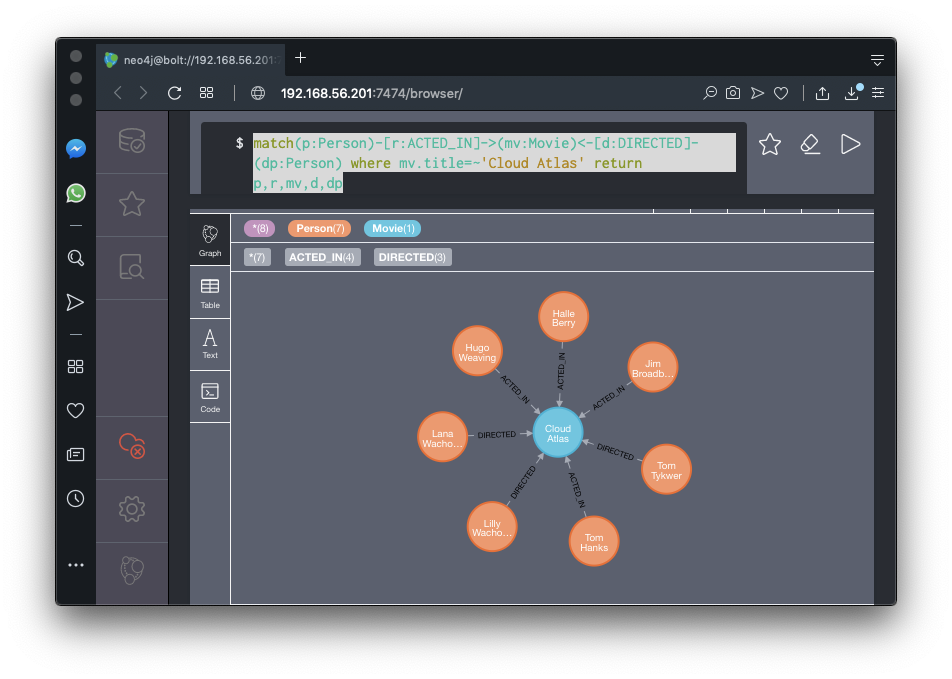

Si on veut collecter les personnes qui ont une relation ACTED_IN où DIRECTED vers un noeud de type film on peut l'exprimer de 2 manières :

Bien entendu, les 2 requêtes donnent le même résultat.

Notez que la requête suivante retourne tous les noeuds qui sont en relation dans le sens des noeuds Person vers le noeud Movie Cloud Atlas sans se préoccuper du type de relation :

## Exercice 1

#### Rechercher tous les noeuds uniquement de type Person où Movie ?

#### Rechercher toutes les noeuds de type Person qui sont nés en 1954 ?

#### Collecter le nom et la description (tagline) de tous les films réalisés en 2000 ?

#### Retourner le graphe de toutes les personnes qui sont impliquées dans le film 'Cloud Atlas' ?

#### Modifier la précédente requête pour afficher uniquement les acteurs du film ?

Compter le nombre de noeud dont le label est person  ?

**Note** la documentation est ici
https://neo4j.com/docs/cypher-manual/current/functions/aggregating/#_counting_with_and_without_duplicates


#### Trouver la personne  qui est intervenue dans le plus de film ?

#### Déterminer le nombre film de Tom Hanks par type de relation ? 

```{note} Note
Le type de relation peut être obtenu avec la fonction type(r).

On utilisera aussi la clause with pour créer des alias comme en SQL avec la clause " with ":

https://neo4j.com/docs/cypher-manual/current/clauses/with/

```

#### Déterminer les films où Tom Hanks est intervenu en tant qu'acteur et réalisateur ?
